# Data Preparation

In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.optimize import minimize
import seaborn as sns

In [43]:
# Step 1: Load the Data
dataset1 = pd.read_csv('/content/preprocessed_data 1.csv')
dataset1.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Ticker,Beta,P/E Ratio,...,PC1,PC2,PC3,Month,DayOfWeek,Daily_Return,MA20,MA50,Log_PE_Ratio,Log_PEG_Ratio
0,2020-01-02,-0.527490,-0.528801,-0.526355,-0.527421,-0.529219,-0.177086,Z74.SI,-0.33756,1.03557,...,-1.746289,-1.285688,0.711104,1.0,3.0,-0.000131,NaN,NaN,0.710776,-0.2276
1,2020-01-03,-0.527319,-0.528716,-0.526527,-0.527676,-0.529440,-0.103929,Z74.SI,-0.33756,1.03557,...,-1.746289,-1.285688,0.711104,1.0,4.0,0.000677,NaN,NaN,0.710776,-0.2276
2,2020-01-06,-0.527745,-0.529055,-0.526527,-0.527847,-0.529587,-0.133960,Z74.SI,-0.33756,1.03557,...,-1.746289,-1.285688,0.711104,1.0,0.0,0.000192,NaN,NaN,0.710776,-0.2276
3,2020-01-07,-0.527831,-0.529139,-0.526871,-0.527761,-0.529513,0.027768,Z74.SI,-0.33756,1.03557,...,-1.746289,-1.285688,0.711104,1.0,1.0,-0.000131,NaN,NaN,0.710776,-0.2276
4,2020-01-08,-0.528257,-0.528885,-0.526871,-0.527506,-0.529293,0.073270,Z74.SI,-0.33756,1.03557,...,-1.746289,-1.285688,0.711104,1.0,2.0,-0.001421,NaN,NaN,0.710776,-0.2276


In [44]:
dataset1.columns

Index(['Date_x', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Ticker', 'Beta', 'P/E Ratio', 'Market Cap', '52 Week High',
       '52 Week Low', '50 Day Moving Average', '200 Day Moving Average',
       'Forward P/E Ratio', 'PEG Ratio', 'Dividend Yield', 'Dividend Rate',
       'Payout Ratio', 'Revenue Growth', 'Profit Margin', 'Year', 'PC1', 'PC2',
       'PC3', 'Month', 'DayOfWeek', 'Daily_Return', 'MA20', 'MA50',
       'Log_PE_Ratio', 'Log_PEG_Ratio'],
      dtype='object')

In [45]:
dataset1.isna().sum()

,0
Date_x,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Ticker,0
Beta,0
P/E Ratio,0


In [46]:
# AGGREGATION

# Assuming df is your DataFrame
aggregated_dataset1 = dataset1.groupby('Ticker').agg({
    'Daily_Return': 'mean',
    'Volume': 'mean',
    'Adj Close': 'mean',
    'Market Cap': 'mean',
    'Beta': 'mean',
    'P/E Ratio': 'mean',
    'PC1': 'mean',
    'PC2': 'mean',
    'PC3': 'mean'
}).reset_index()

aggregated_dataset1


,Ticker,Daily_Return,Volume,Adj Close,Market Cap,Beta,P/E Ratio,PC1,PC2,PC3
0,9CI.SI,0.000058,-0.208416,-0.527212,1.582730e+10,-0.194696,2.263523,0.598509,0.588040,0.065306
1,BN4.SI,0.000036,-0.251733,-0.518566,1.195632e+10,0.016401,-0.400292,-0.007453,-0.007557,-0.001224
2,C38U.SI,0.000029,-0.045940,-0.538711,1.566621e+10,0.157133,-0.388624,-0.007453,-0.007557,-0.001224
3,C6L.SI,0.000105,-0.233041,-0.511523,2.004206e+10,0.395950,-0.546486,-0.007453,-0.007557,-0.001224
4,CY6U.SI,0.000023,-0.295700,-0.545019,1.556755e+09,-0.009186,-0.634197,-0.007453,-0.007557,-0.001224
5,ES3.SI,0.000046,-0.309035,-0.530372,1.000000e-05,-1.433540,-0.501949,-0.121835,-0.393633,-0.295904
6,F34.SI,0.000115,-0.229779,-0.522621,2.066344e+10,-0.459101,-0.572957,-0.007453,-0.007557,-0.001224
7,J36.SI,0.004948,-0.324485,-0.168491,1.024264e+10,-0.572113,3.000000,-0.007453,-0.007557,-0.001224
8,J69U.SI,0.000022,-0.282518,-0.536449,4.203074e+09,-0.279988,-0.253159,-0.007453,-0.007557,-0.001224
9,M44U.SI,0.000030,-0.109767,-0.540813,7.518913e+09,-0.154182,-0.141797,-0.007453,-0.007557,-0.001224


In [47]:
# Z score normalisation

# Selecting columns to normalize (excluding 'Ticker')
columns_to_normalize = aggregated_dataset1.columns.difference(['Ticker'])

# Initializing the scaler
scaler = StandardScaler()

# Standardizing the selected columns
aggregated_dataset1[columns_to_normalize] = scaler.fit_transform(aggregated_dataset1[columns_to_normalize])

# Display the standardized dataset
aggregated_dataset1



,Ticker,Daily_Return,Volume,Adj Close,Market Cap,Beta,P/E Ratio,PC1,PC2,PC3
0,9CI.SI,-0.249707,0.075973,-0.396465,-0.203759,0.162988,2.096862,3.807678,3.291687,1.089297
1,BN4.SI,-0.267666,-0.337781,-0.305692,-0.403400,0.621562,-0.423081,-0.203370,-0.074000,0.192264
2,C38U.SI,-0.274045,1.627873,-0.517193,-0.212067,0.927278,-0.412043,-0.203370,-0.074000,0.192264
3,C6L.SI,-0.209998,-0.159240,-0.231752,0.013612,1.446070,-0.561379,-0.203370,-0.074000,0.192264
4,CY6U.SI,-0.278746,-0.757737,-0.583415,-0.939744,0.565977,-0.644353,-0.203370,-0.074000,0.192264
5,ES3.SI,-0.259908,-0.885110,-0.429643,-1.020031,-2.528195,-0.519247,-0.960501,-2.255689,-3.780994
6,F34.SI,-0.201236,-0.128080,-0.348268,0.045659,-0.411388,-0.586420,-0.203370,-0.074000,0.192264
7,J36.SI,3.872009,-1.032682,3.369582,-0.491780,-0.656887,2.793562,-0.203370,-0.074000,0.192264
8,J69U.SI,-0.280133,-0.631825,-0.493441,-0.803263,-0.022295,-0.283894,-0.203370,-0.074000,0.192264
9,M44U.SI,-0.272859,1.018225,-0.539255,-0.632253,0.250997,-0.178547,-0.203370,-0.074000,0.192264


# KMeans Clustering

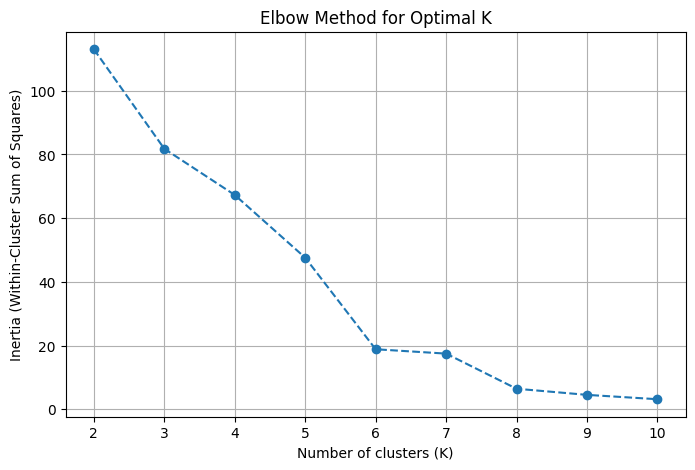

In [48]:
# Step 2: K means clustering

# Method 1: ELBOW METHOD TO FIND THE OPTIMAL K-value
# 'aggregated_dataset1' is already normalized, excluding 'Ticker'
columns_to_cluster = aggregated_dataset1.columns.difference(['Ticker'])

# List to store the inertia for each K value
inertia_values = []

# Checking for K values between 2 and 10 (you can adjust the range)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(aggregated_dataset1[columns_to_cluster])
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# inertia decreases fast between 3 and 4

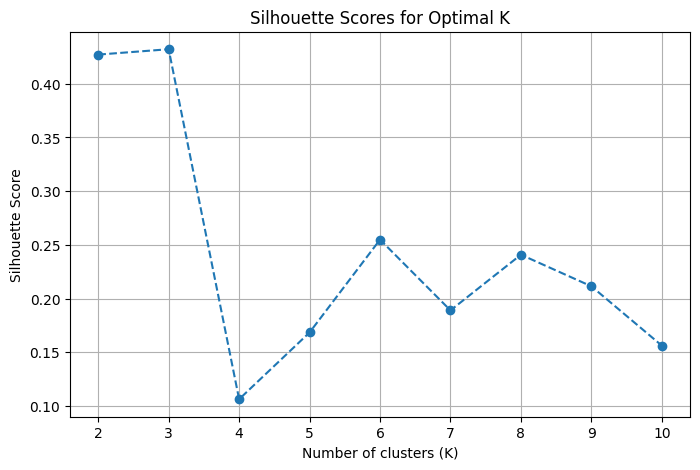

In [49]:
# Method 2: SILHOUETTE SCORE TO FIND THE OPTIMAL K
from sklearn.metrics import silhouette_score

# List to store silhouette scores for each K
silhouette_scores = []

# Checking silhouette score for K values between 2 and 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(aggregated_dataset1[columns_to_cluster])
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(aggregated_dataset1[columns_to_cluster], labels))

# Plotting Silhouette Score Curve
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Highest point is 3, 4

In [50]:
def apply_kmeans(scaled_data, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    return kmeans, clusters

In [51]:
aggregated_dataset1[columns_to_cluster].head()

,Adj Close,Beta,Daily_Return,Market Cap,P/E Ratio,PC1,PC2,PC3,Volume
0,-0.396465,0.162988,-0.249707,-0.203759,2.096862,3.807678,3.291687,1.089297,0.075973
1,-0.305692,0.621562,-0.267666,-0.403400,-0.423081,-0.203370,-0.074000,0.192264,-0.337781
2,-0.517193,0.927278,-0.274045,-0.212067,-0.412043,-0.203370,-0.074000,0.192264,1.627873
3,-0.231752,1.446070,-0.209998,0.013612,-0.561379,-0.203370,-0.074000,0.192264,-0.159240
4,-0.583415,0.565977,-0.278746,-0.939744,-0.644353,-0.203370,-0.074000,0.192264,-0.757737


In [52]:
k5,c5 = apply_kmeans(aggregated_dataset1[columns_to_cluster],5)
aggregated_dataset1['Cluster5'] = c5

In [53]:
k4,c4 = apply_kmeans(aggregated_dataset1[columns_to_cluster],4)
aggregated_dataset1['Cluster4'] = c4

In [54]:
k3,c3 = apply_kmeans(aggregated_dataset1[columns_to_cluster],3)
aggregated_dataset1['Cluster3'] = c3

In [55]:
aggregated_dataset1.head()

,Ticker,Daily_Return,Volume,Adj Close,Market Cap,Beta,P/E Ratio,PC1,PC2,PC3,Cluster5,Cluster4,Cluster3
0,9CI.SI,-0.249707,0.075973,-0.396465,-0.203759,0.162988,2.096862,3.807678,3.291687,1.089297,2,2,2
1,BN4.SI,-0.267666,-0.337781,-0.305692,-0.403400,0.621562,-0.423081,-0.203370,-0.074000,0.192264,3,3,1
2,C38U.SI,-0.274045,1.627873,-0.517193,-0.212067,0.927278,-0.412043,-0.203370,-0.074000,0.192264,1,1,1
3,C6L.SI,-0.209998,-0.159240,-0.231752,0.013612,1.446070,-0.561379,-0.203370,-0.074000,0.192264,1,1,1
4,CY6U.SI,-0.278746,-0.757737,-0.583415,-0.939744,0.565977,-0.644353,-0.203370,-0.074000,0.192264,3,3,1


In [56]:
numeric_cols = aggregated_dataset1.select_dtypes(include=['number']).columns
# print(cluster_summary)
def plot_feature_boxplot(agg_data, feature, cluster_feature):

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cluster_feature, y=feature, data=agg_data)
    plt.title(f'Distribution of {feature} Across Clusters')
    plt.ylabel(f'{feature}')
    plt.xlabel(cluster_feature)
    plt.tight_layout()
    plt.show()
def plot_cluster_scatter(cluster_summary, feature_x, feature_y):

    plt.figure(figsize=(10, 6))

    plt.scatter(cluster_summary[feature_x], cluster_summary[feature_y], s=100, c=cluster_summary.index, cmap='Set1', label=cluster_summary.index)

    for i, label in enumerate(cluster_summary.index):
        plt.annotate(label, (cluster_summary[feature_x][i], cluster_summary[feature_y][i]), textcoords="offset points", xytext=(5,5), ha='center')

    plt.title(f'{feature_x} vs {feature_y} by Cluster')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.grid(True)
    plt.colorbar()
    plt.show()

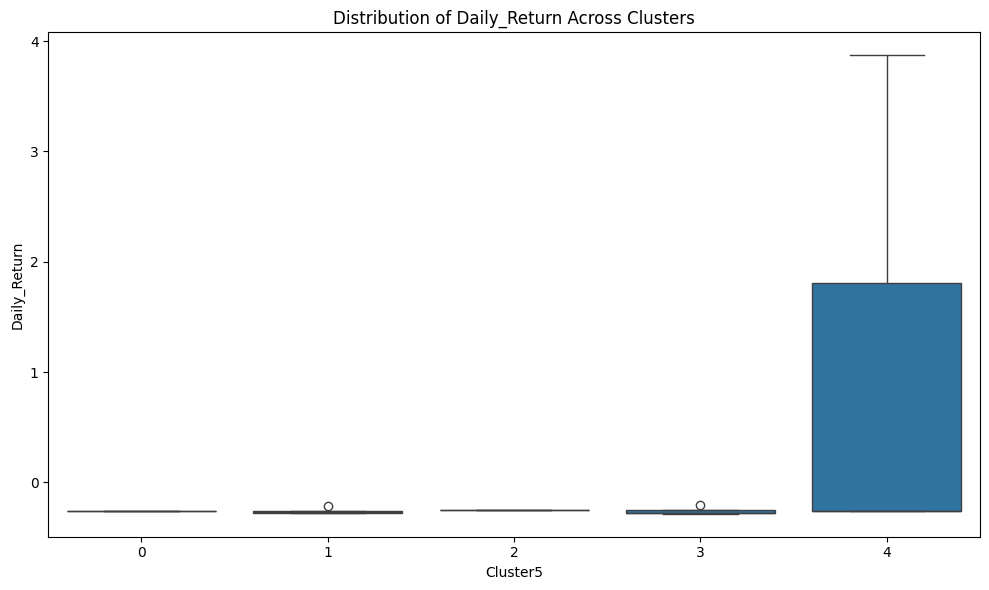

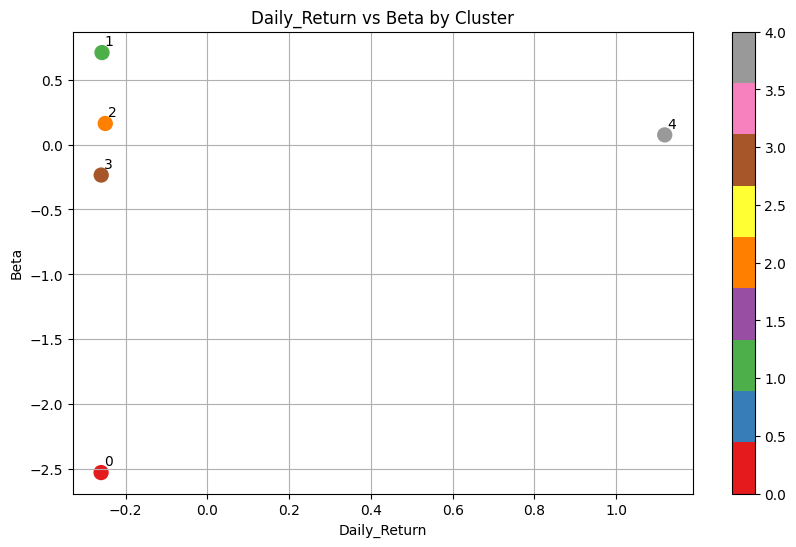

In [57]:
cluster_summary = aggregated_dataset1.groupby('Cluster5')[numeric_cols].mean()
plot_feature_boxplot(aggregated_dataset1, 'Daily_Return', 'Cluster5')
plot_cluster_scatter(cluster_summary, 'Daily_Return', 'Beta')

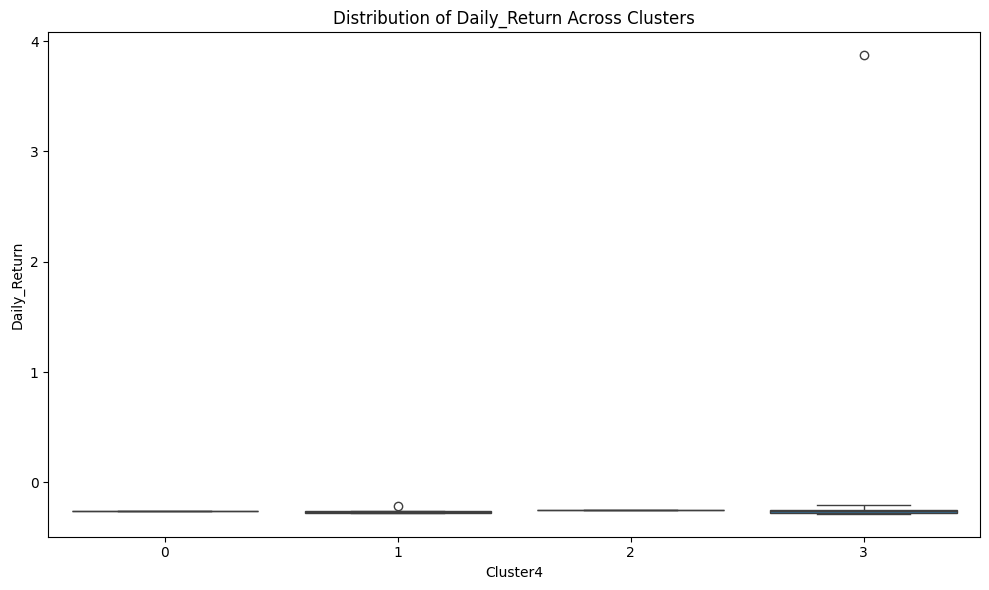

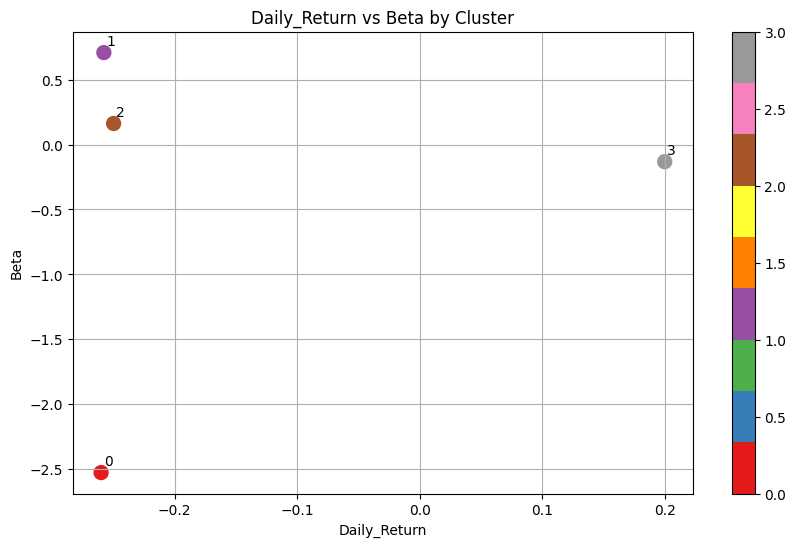

In [58]:
cluster_summary = aggregated_dataset1.groupby('Cluster4')[numeric_cols].mean()
plot_feature_boxplot(aggregated_dataset1, 'Daily_Return', 'Cluster4')
plot_cluster_scatter(cluster_summary, 'Daily_Return', 'Beta')

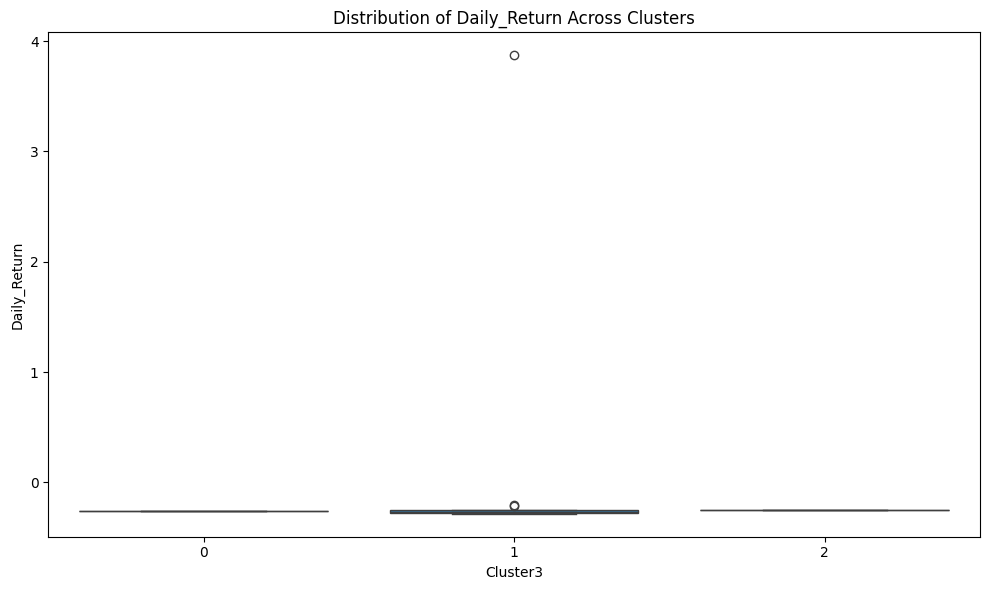

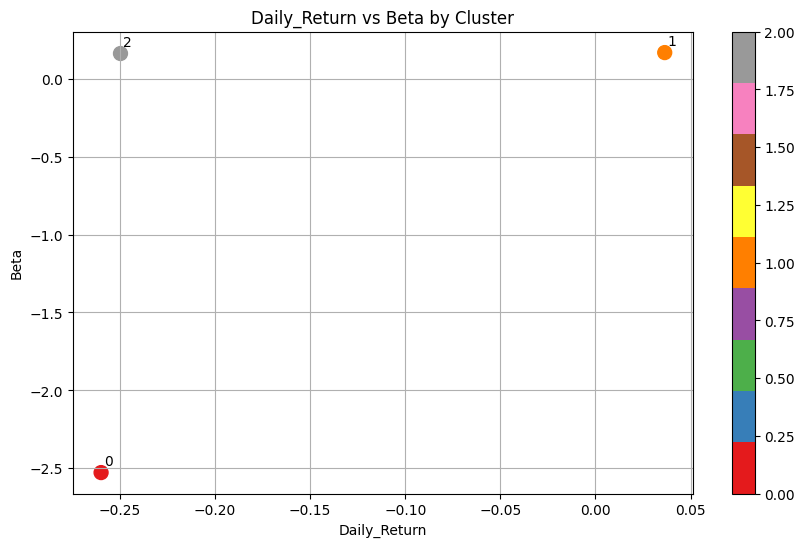

In [59]:
cluster_summary = aggregated_dataset1.groupby('Cluster3')[numeric_cols].mean()
plot_feature_boxplot(aggregated_dataset1, 'Daily_Return', 'Cluster3')
plot_cluster_scatter(cluster_summary, 'Daily_Return', 'Beta')

In [60]:
# Selecting the risk with min risk and max return
def minimize_risk(aggregated_data, kmeans, n_min_stocks=10):
    # if determine_criteria(kmeans) == 'risk':
    #     print("Proceeding with risk minimization strategy...")
    # else:
    #     print("Risk minimization not ideal, but proceeding as requested.")

    sorted_points = aggregated_data.sort_values(by='Beta', ascending=True).index  # Sort by Beta (low to high)
    representative_stocks = aggregated_data.iloc[sorted_points[:n_min_stocks]]['Ticker'].values
    return representative_stocks

def maximize_returns(aggregated_data, kmeans, n_min_stocks=10):
    # if determine_criteria(kmeans) == 'return':
    #     print("Proceeding with return maximization strategy...")
    # else:
    #     print("Return maximization not ideal, but proceeding as requested.")

    sorted_points = aggregated_data.sort_values(by='Daily_Return', ascending=False).index  # Sort by Daily Return (high to low)
    representative_stocks = aggregated_data.iloc[sorted_points[:n_min_stocks]]['Ticker'].values
    return representative_stocks

In [61]:
min_risk_10stock = minimize_risk(aggregated_dataset1, kmeans)

In [62]:
max_return_10stock = maximize_returns(aggregated_dataset1, kmeans)

In [63]:
print("stocks with minimum risks: ",min_risk_10stock)
print("stocks with maximum returns: ",max_return_10stock)

stocks with minimum risks:  ['ES3.SI' 'S68.SI' 'J36.SI' 'F34.SI' 'S63.SI' 'Z74.SI' 'J69U.SI' 'O39.SI'
 '9CI.SI' 'M44U.SI']
stocks with maximum returns:  ['J36.SI' 'F34.SI' 'C6L.SI' 'S63.SI' '9CI.SI' 'O39.SI' 'U11.SI' 'ES3.SI'
 'N2IU.SI' 'BN4.SI']


# Building portfolio

In [64]:
# Equal Weight (EW) Portfolio

def equal_weight_portfolio(n):
    return np.array([1.0 / n] * n)

# Number of stocks
n_stocks = 10

# Equal weights for the portfolio
ew_weights = equal_weight_portfolio(n_stocks)


In [65]:
# Market Cap Weighted (MCW) Portfolio

def market_cap_weighted_portfolio(stock_data):
    # Extract market capitalization
    market_caps = stock_data['Market Cap']

    # Normalize market caps to sum to 1
    mcw_weights = market_caps / market_caps.sum()

    return mcw_weights

# Market cap weighted portfolio
mcw_weights_min_risk = market_cap_weighted_portfolio(aggregated_dataset1)
mcw_weights_max_return = market_cap_weighted_portfolio(aggregated_dataset1)


In [66]:
# Function to calculate portfolio variance
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Function to find the Global Minimum Variance Portfolio weights
def global_minimum_variance_portfolio(cov_matrix):
    n = len(cov_matrix)
    # Constraints: Sum of weights must be 1
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    # Bounds: All weights should be between 0 and 1
    bounds = tuple((0, 1) for _ in range(n))
    # Initial guess for the weights (equal distribution)
    initial_weights = np.array([1.0 / n] * n)

    # Minimization process
    result = minimize(portfolio_variance, initial_weights, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x  # Optimal weights

# Calculate covariance matrix
cov_matrix = aggregated_dataset1[columns_to_cluster].cov()

# Get the weights for the Global Minimum Variance Portfolio
gmv_weights = global_minimum_variance_portfolio(cov_matrix)

print("Global Minimum Variance Portfolio Weights:", gmv_weights)

Global Minimum Variance Portfolio Weights: [1.10272872e-01 1.34520666e-01 2.19039886e-01 1.22057445e-01
 1.30104261e-17 1.93572072e-01 9.10729825e-18 6.59194921e-17
 2.20537058e-01]


In [67]:
from scipy.optimize import dual_annealing

# Global Minimum Variance Portfolio with Simulated Annealing
def global_minimum_variance_sa(cov_matrix):
    n = len(cov_matrix)

    # Objective function for variance minimization
    def objective(weights):
        return portfolio_variance(weights, cov_matrix)

    # Constraints: Sum of weights = 1
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    # Bounds: All weights should be between 0 and 1
    bounds = [(0, 1) for _ in range(n)]

    # Simulated Annealing optimization
    result = dual_annealing(objective, bounds=bounds)

    return result.x  # Optimal weights

# Get the weights using Simulated Annealing
gmv_sa_weights = global_minimum_variance_sa(cov_matrix)

print("Global Minimum Variance Portfolio Weights (Simulated Annealing):", gmv_sa_weights)

Global Minimum Variance Portfolio Weights (Simulated Annealing): [0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [68]:
# Function to calculate portfolio return
def portfolio_return(weights, mean_returns):
    return np.dot(weights, mean_returns)

# Function to calculate portfolio Sharpe Ratio (assuming risk-free rate is 0.02)
def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.02):
    port_return = portfolio_return(weights, mean_returns)
    port_variance = portfolio_variance(weights, cov_matrix)
    return (port_return - risk_free_rate) / np.sqrt(port_variance)

# Function to find Maximum Sharpe Ratio Portfolio weights
def max_sharpe_ratio_portfolio(mean_returns, cov_matrix, risk_free_rate=0.02):
    n = len(mean_returns)
    # Constraints: Sum of weights must be 1
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    # Bounds: All weights should be between 0 and 1
    bounds = tuple((0, 1) for _ in range(n))
    # Initial guess for the weights (equal distribution)
    initial_weights = np.array([1.0 / n] * n)

    # Minimization process (we maximize Sharpe Ratio by minimizing the negative Sharpe Ratio)
    result = minimize(lambda weights: -sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate),
                      initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x  # Optimal weights

# Calculate mean returns
mean_returns = aggregated_dataset1[columns_to_cluster].mean()

# Get the weights for the Maximum Sharpe Ratio Portfolio
msr_weights = max_sharpe_ratio_portfolio(mean_returns, cov_matrix)

print("Maximum Sharpe Ratio Portfolio Weights:", msr_weights)

Maximum Sharpe Ratio Portfolio Weights: [2.99158277e-17 1.23402129e-16 5.33352962e-17 0.00000000e+00
 9.43866366e-16 2.99807586e-01 7.00192414e-01 0.00000000e+00
 0.00000000e+00]


In [69]:
# Maximum Sharpe Ratio Portfolio with Simulated Annealing
def max_sharpe_ratio_sa(mean_returns, cov_matrix, risk_free_rate=0.02):
    n = len(mean_returns)

    # Objective function for Sharpe ratio maximization (maximize by minimizing negative Sharpe ratio)
    def objective(weights):
        return -sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate)

    # Bounds: All weights should be between 0 and 1
    bounds = [(0, 1) for _ in range(n)]

    # Simulated Annealing optimization
    result = dual_annealing(objective, bounds=bounds)

    return result.x  # Optimal weights

# Get the weights using Simulated Annealing
msr_sa_weights = max_sharpe_ratio_sa(mean_returns, cov_matrix)

print("Maximum Sharpe Ratio Portfolio Weights (Simulated Annealing):", msr_sa_weights)


Maximum Sharpe Ratio Portfolio Weights (Simulated Annealing): [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [70]:
from scipy.optimize import differential_evolution

# Global Minimum Variance Portfolio with Differential Evolution
def global_minimum_variance_de(cov_matrix):
    n = len(cov_matrix)

    def objective(weights):
        # Portfolio variance as the objective
        variance = portfolio_variance(weights, cov_matrix)
        # Apply penalty if weights do not sum to 1
        penalty = 100 * abs(np.sum(weights) - 1)  # Penalty factor can be adjusted
        return variance + penalty

    # Bounds: weights between 0 and 1
    bounds = [(0, 1) for _ in range(n)]

    # Differential Evolution Optimization
    result = differential_evolution(objective, bounds=bounds)

    return result.x

# Maximum Sharpe Ratio Portfolio with Differential Evolution
def max_sharpe_ratio_de(mean_returns, cov_matrix, risk_free_rate=0.02):
    n = len(mean_returns)

    def objective(weights):
        # Negative Sharpe ratio (to maximize Sharpe)
        sharpe_ratio_value = -sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate)
        # Apply penalty if weights do not sum to 1
        penalty = 100 * abs(np.sum(weights) - 1)  # Penalty factor can be adjusted
        return sharpe_ratio_value + penalty

    # Bounds: weights between 0 and 1
    bounds = [(0, 1) for _ in range(n)]

    # Differential Evolution Optimization
    result = differential_evolution(objective, bounds=bounds)

    return result.x

# Example usage
gmv_de_weights = global_minimum_variance_de(cov_matrix)
print("Global Minimum Variance Portfolio Weights (Differential Evolution):", gmv_de_weights)

msr_de_weights = max_sharpe_ratio_de(mean_returns, cov_matrix)
print("Maximum Sharpe Ratio Portfolio Weights (Differential Evolution):", msr_de_weights)

Global Minimum Variance Portfolio Weights (Differential Evolution): [0.11074514 0.12651465 0.23381951 0.12671556 0.         0.18994201
 0.00075226 0.00084956 0.21066129]
Maximum Sharpe Ratio Portfolio Weights (Differential Evolution): [0.         0.00085302 0.         0.00158097 0.01953936 0.35878486
 0.61470197 0.00244883 0.00209098]


If you want to integrate clustering into the portfolio construction process, one approach could involve creating portfolios within each cluster separately or using clusters to select a subset of stocks, which could then be fed into portfolio optimization steps like GMV or MSR calculations.

# LSTM

In [71]:
# Step 1: Data Preparation for LSTM
import numpy as np

# Assuming you have a DataFrame 'aggregated_dataset1' with stock price data
# Create a function to prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Change to appropriate column index if necessary
        y.append(data[i + time_step, 0])  # Change to appropriate column index if necessary
    return np.array(X), np.array(y)

# Normalizing the 'Adj Close' prices
data = aggregated_dataset1[['Adj Close']].values  # Use appropriate column
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Create sequences
time_step = 10  # Choose your time step
X, y = create_dataset(data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 2: Define and Compile the LSTM Model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 3: Train the LSTM Model
model.fit(X, y, epochs=100, batch_size=32)

# Step 4: Make Predictions
# You can use the last 'time_step' observations to make predictions
last_data = data[-time_step:]  # Get the last 'time_step' values
last_data = last_data.reshape(1, time_step, 1)  # Reshape for LSTM

# Predict the next value
predicted_price = model.predict(last_data)
predicted_price = scaler.inverse_transform(predicted_price)  # Inverse transform to original scale

print(f"Predicted next price: {predicted_price.flatten()[0]}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0639
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0555
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0507
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0441
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0398
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0353
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0342
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0271
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0273
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0249
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0324
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0280
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0370
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0344
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0379
Epoch 16/100
1/1 ━━━━━━━━━━━━

Evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Mean Squared Error (MSE): 0.2022611323390785
Mean Absolute Error (MAE): 0.4200304886063672


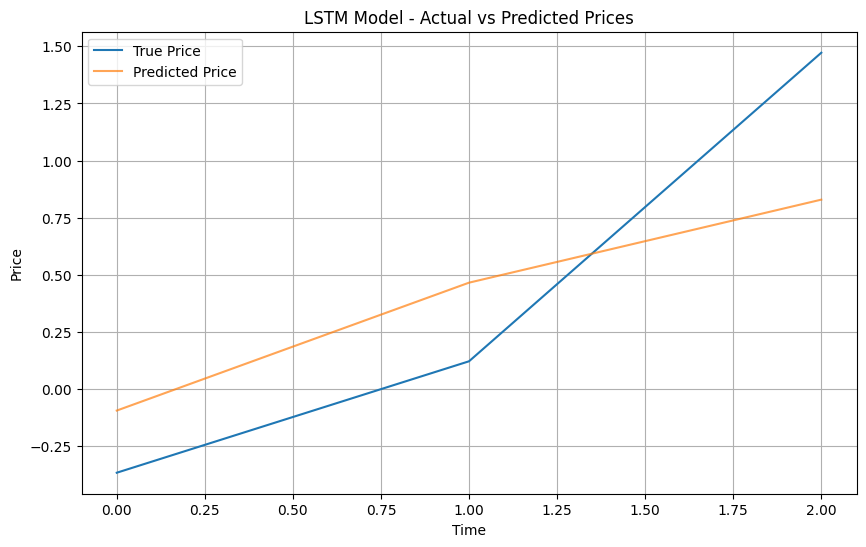

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size, :], data[train_size - time_step:, :]  # Include some overlap for testing

# Create datasets for train and test sets
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape for LSTM model input format
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Model evaluation on the test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling to original values
y_test = scaler.inverse_transform([y_test])  # Inverse scaling for y_test

# Calculate evaluation metrics
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test[0], label="True Price")
plt.plot(predictions[:, 0], label="Predicted Price", alpha=0.7)
plt.title("LSTM Model - Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()